In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../CSV/Transformed House Price2.csv')


In [2]:
df['mean_sales'] = df['Sale_Price'].mean()
df['mean_sales'].head()


0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

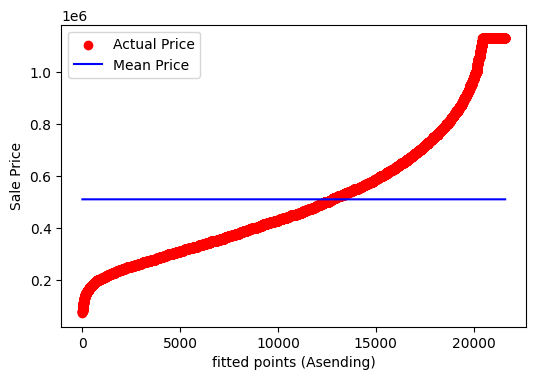

In [3]:
plt.figure(dpi=100)
k = range(0, len(df))
plt.scatter(k, df['Sale_Price'].sort_values(),
            color='red', label='Actual Price')
plt.plot(k, df['mean_sales'], color='blue', label='Mean Price')
plt.xlabel('fitted points (Asending)')
plt.ylabel('Sale Price')
plt.legend()


In [4]:
grades_mean = df.pivot_table(
    values='Sale_Price', columns='Overall Grade', aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [5]:
# making new column
df['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
    df['grade_mean'][df['Overall Grade'] == i] = grades_mean[i][0]

df['grade_mean'].head()

C:\Users\modik\AppData\Local\Temp\ipykernel_4064\1636073062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_mean'][df['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [6]:
gradewise_list = []
for i in range(1, 11):
    k = df["Sale_Price"][df["Overall Grade"] == i]
    gradewise_list.append(k)

In [7]:
classwise_list = []
for i in range(1, 11):
    k = df["Sale_Price"][df["Overall Grade"] == i]
    classwise_list.append(k)

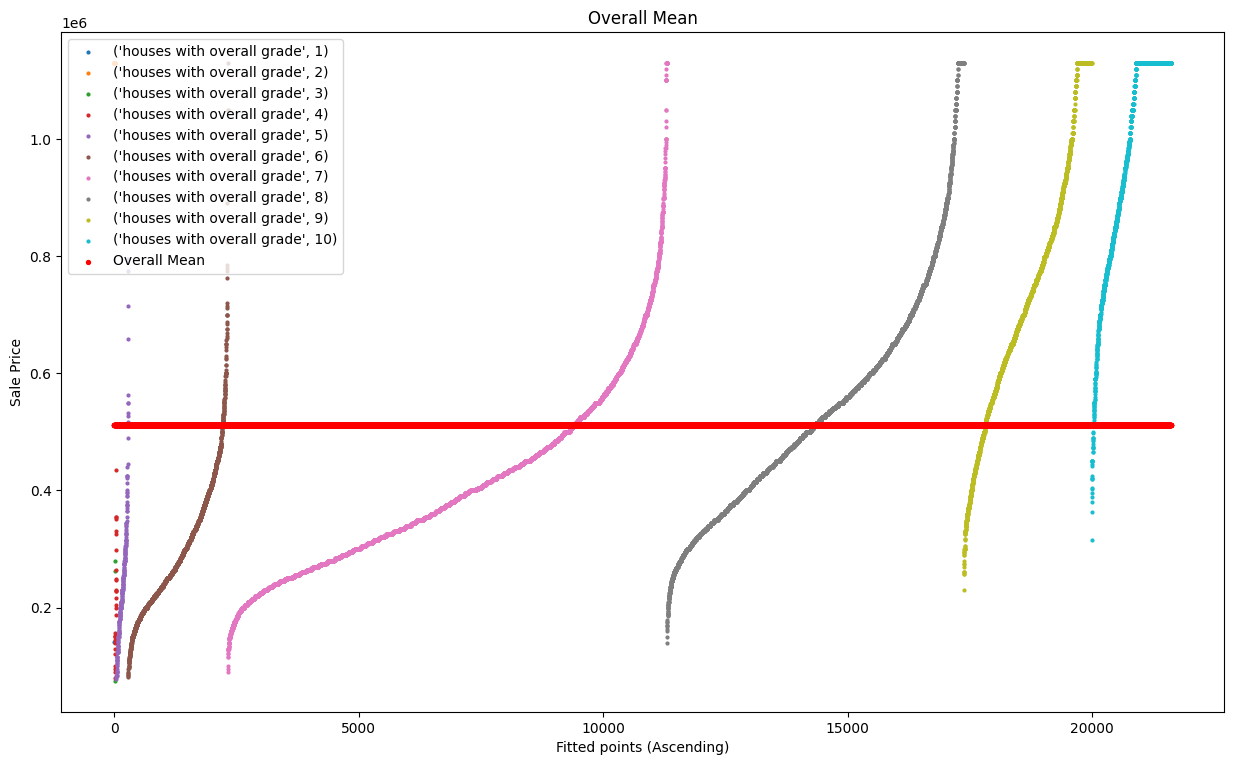

In [8]:
plt.figure(dpi=100, figsize=(15, 9))

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1, 11):
    # defining x-axis using z
    points = [k for k in range(z, z + len(gradewise_list[i-1]))]
    # plotting
    plt.scatter(points,  # x-axis
                np.sort(gradewise_list[i-1], axis=0),  # y-axis
                label=('houses with overall grade', i), s=4)
    z = max(points) + 1  # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
            df['mean_sales'],
            color='red',
            label='Overall Mean',
            s=8)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend()

In [9]:
mean_difference = df['mean_sales'] - df['Sale_Price']
grade_mean_difference = df['grade_mean'] - df['Sale_Price']

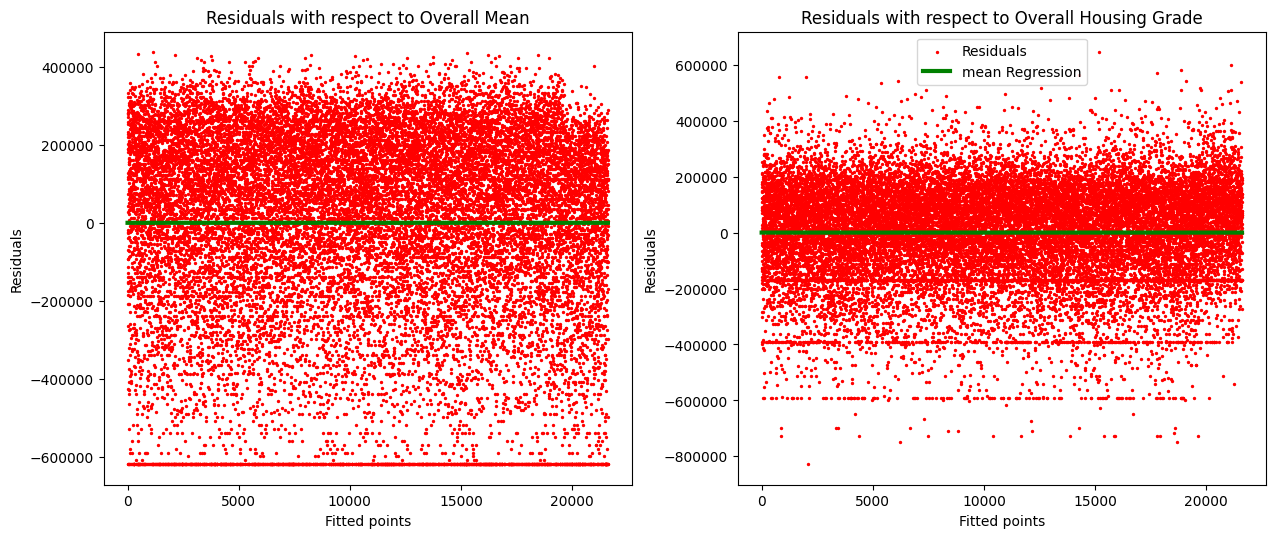

In [10]:
k = range(0, len(df))
l = [0 for i in range(len(df))]

plt.figure(figsize=(15, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.scatter(k, mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, l, color='green', label='mean Regression', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1, 2, 2)
plt.scatter(k, grade_mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, l, color='green', label='mean Regression', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [12]:
df

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000,3,2.50,1530,1131,3.0,0,8,1530,0,...,0,1,0,0,0,0,0,0,511618.558147,537584.082097
21605,400000,4,2.50,2310,5813,2.0,0,8,2310,0,...,0,0,0,0,0,0,0,0,511618.558147,537584.082097
21606,402101,2,0.75,1020,1350,2.0,0,7,1020,0,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
21607,400000,3,2.50,1600,2388,2.0,0,8,1600,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
